## Example: 3D Heat Equation

### What Features Are We Using

* Mesh data 
* Domain Decomposition

We now look at a more complicated example at and show how simulation results
can be visualized. This example solves the heat equation,

$$\frac{\partial\phi}{\partial t} = \nabla^2\phi$$

using forward Euler temporal integration on a periodic domain.  We could use a
5-point (in 2D) or 7-point (in 3D) stencil, but for demonstration purposes we
spatially discretize the PDE by first constructing (negative) fluxes on cell faces, e.g.,

$$F_{i+^1\!/_2,\,j} = \frac{\phi_{i+1,j}-\phi_{i,j}}{\Delta x}$$

and then taking the divergence to update the cells:

   $$\phi_{i,\,j}^{n+1} = \phi_{i,\,j}^n
   + \frac{\Delta t}{\Delta x}\left(F_{i+^1\!/_2,\,j}-F_{i-^1\!/_2,\,j}\right)
   + \frac{\Delta t}{\Delta y}\left(F_{i,\,j+^1\!/_2}-F_{i,\,j-^1\!/_2}\right)$$

The code to generate the initial condition is in `mykernel.H` and looks like: 
```C++
{
    Real x = prob_lo[0] + (i+Real(0.5)) * dx[0];
    Real y = prob_lo[1] + (j+Real(0.5)) * dx[1];
    Real z = prob_lo[2] + (k+Real(0.5)) * dx[2];
    Real r2 = ((x-Real(0.25))*(x-Real(0.25))+(y-Real(0.25))*(y-Real(0.25))+(z-Real(0.25))*(z-Real(0.25)))/Real(0.01);
    phi(i,j,k) = Real(1.) + std::exp(-r2);
}
```

## Running the code

The simulation can be ran as `./03_HeatEquation inputs`. 

The following inputs parameters could be tweaked:

```
nsteps        = 1000              # number of time steps to take
plot_int      = 100               # write plots every n steps
n_cell        = 128               # number of cells in the domain
max_grid_size = 64                # max grid size used for domain decomposition

```

Although we are running this example in serial, we decompose the domain into multiple boxes, anticipating more complicated problems where we have mesh refinement:

```C++
        IntVect dom_lo(AMREX_D_DECL(       0,        0,        0));
        IntVect dom_hi(AMREX_D_DECL(n_cell-1, n_cell-1, n_cell-1));
        Box domain(dom_lo, dom_hi);

        // Initialize the boxarray "ba" from the single box "bx"
        ba.define(domain);
        // Break up boxarray "ba" into chunks no larger than "max_grid_size" along a direction
        ba.maxSize(max_grid_size);

```

## Visualizating the results

Below we give some python code to visualizate the solution using yt:

In [1]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [2]:
ls

barenblatt.h  Make.package  myfunc.H    Visualization.ipynb
main.cpp      myfunc.cpp    mykernel.H  visualization.py


yt : [INFO     ] 2023-07-03 18:31:17,434 Parameters: current_time              = 0.01
yt : [INFO     ] 2023-07-03 18:31:17,435 Parameters: domain_dimensions         = [256 256   1]


yt : [INFO     ] 2023-07-03 18:31:17,435 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-03 18:31:17,435 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-07-03 18:31:17,529 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:17,530 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:17,531 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:17,532 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:17,533 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



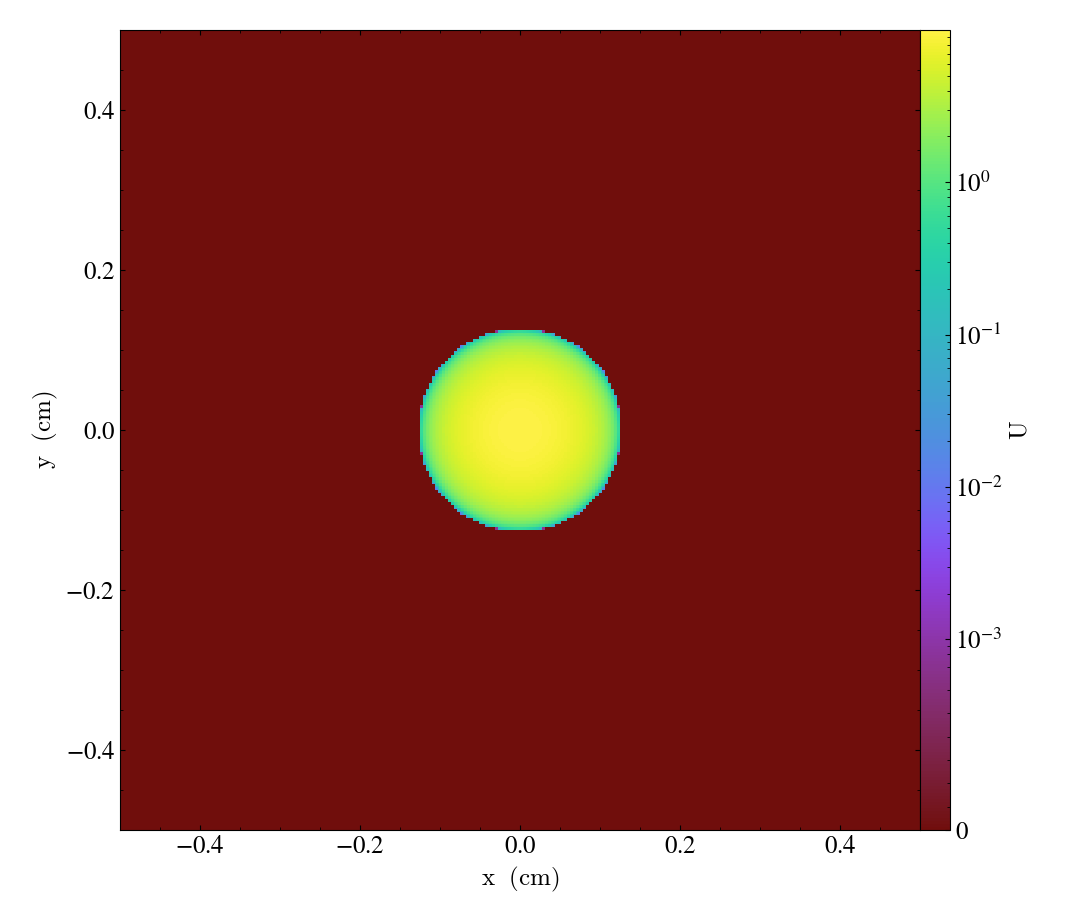

In [59]:
ds = AMReXDataset("../Exec/build/plt00000/")
sl = yt.SlicePlot(ds, 2, ('boxlib', 'u'))
sl

In [4]:
ds.field_list

[('boxlib', 'u')]

yt : [INFO     ] 2023-07-03 18:31:21,119 Parameters: current_time              = 0.0101
yt : [INFO     ] 2023-07-03 18:31:21,120 Parameters: domain_dimensions         = [256 256   1]
yt : [INFO     ] 2023-07-03 18:31:21,120 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-03 18:31:21,120 Parameters: domain_right_edge         = [1. 1. 1.]


yt : [INFO     ] 2023-07-03 18:31:21,205 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:21,205 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:21,207 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:21,208 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-07-03 18:31:21,209 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



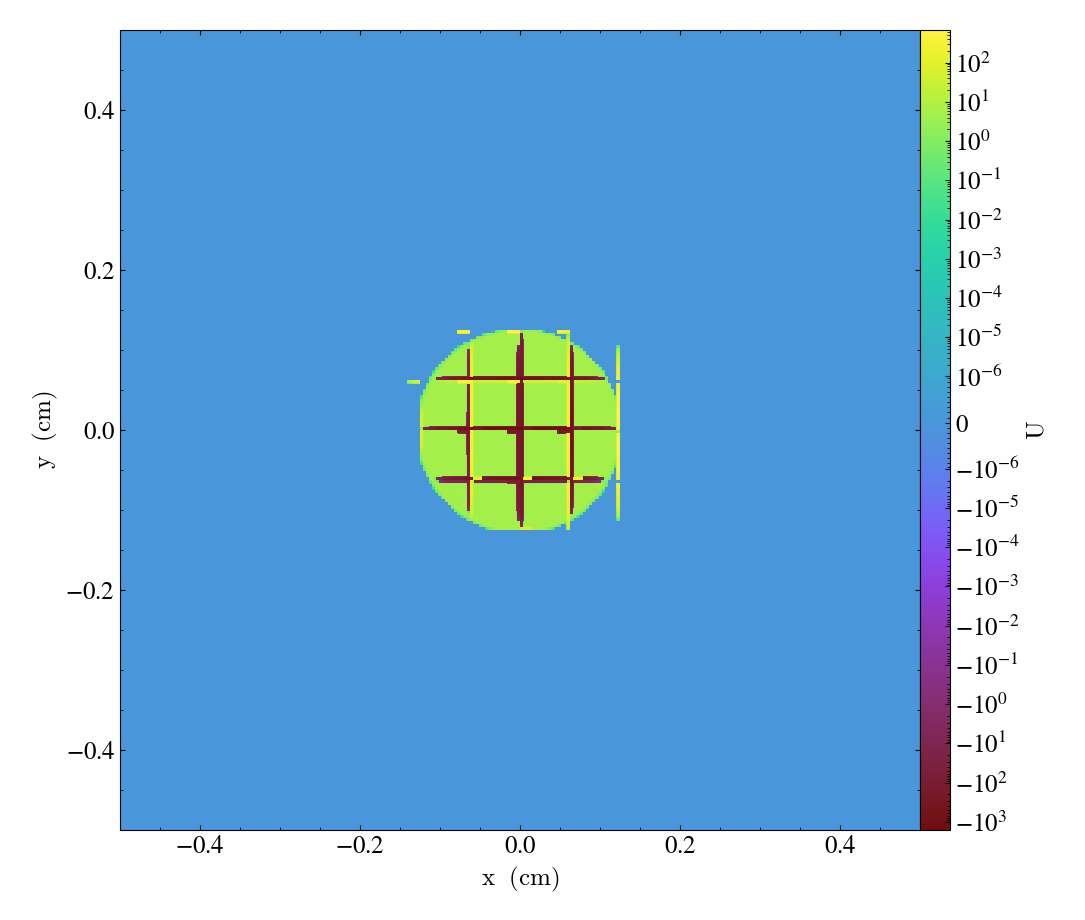

In [60]:
ds = AMReXDataset("../Exec/build/plt00001/")
sl = yt.SlicePlot(ds, 2, ('boxlib', 'u'))
sl

In [55]:
# sl.annotate_grids()